<a href="https://colab.research.google.com/github/tygerlord/le-probleme-sat/blob/main/testq9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[le problème sat](https://blog.pasithee.fr/2013/02/25/le-probleme-sat/)

In [ ]:
!pip install qiskit
!pip install pylatexenc

In [16]:
%matplotlib inline
import qiskit as q

import matplotlib.pyplot as plt

import numpy as np

import math
import operator


# Test circuit

# Préparation

sat-pb.png

In [17]:
import cv2 as cv
from google.colab.patches import cv2_imshow

# (x+y+z).(!x+!y).(!x+y+z)


# Construction du circuit

In [18]:
def test1():
    circuit = q.QuantumCircuit(10, 4)

    circuit.barrier()
    circuit.h([0,1,2])

    circuit.barrier()
    circuit.x([3,4,5])
    circuit.cx(0,3)
    circuit.cx(1,4)
    circuit.cx(2,5)

    circuit.barrier()
    circuit.cx([0,1,2], 6)

    circuit.barrier()
    circuit.cx([0+3,1+3], 7)

    circuit.barrier()
    circuit.cx([0+3,1,2], 8)


    circuit.barrier()
    circuit.mct([6,7,8], 9)


    circuit.barrier()
    m = range(0,3)
    circuit.measure(m,m)
    circuit.measure(9,3)
    return circuit
    
def test2():
    circuit = q.QuantumCircuit(10, 4)

    circuit.barrier()
    circuit.h([0,1,2])

    circuit.barrier()
    circuit.x([3,4,5])
    circuit.cx([0,1,2], [3,4,5])

    circuit.barrier()
    circuit.mct([0,1,2], 6)
 
    circuit.barrier()
    circuit.mct([3,4], 7)
 
    circuit.barrier()
    circuit.mct([3,1,2], 8)
 
    circuit.barrier()
    circuit.mct([6,7,8], 9)

    circuit.barrier()
    m = range(0,3)
    circuit.measure(m,m)
    circuit.measure(9,3)
    return circuit

def test3():
    circuit = q.QuantumCircuit(10, 4)

    circuit.barrier()
    circuit.h([0,1,2])

    circuit.barrier()
    circuit.x([3,4,5])
    circuit.cx([0,1,2], [3,4,5])

    circuit.barrier()
    circuit.mct([3,4,5],6)
 
    circuit.barrier()
    circuit.mct([0,1],7)
 
    circuit.barrier()
    circuit.mct([0,4,5],8)

    circuit.barrier()
    circuit.x([6,7,8])

    circuit.barrier()
    circuit.mct([6,7,8],9)

    circuit.barrier()
    m = range(0,3)
    circuit.measure(m,m)
    circuit.measure(9,3)
    return circuit

circuit = test3()

#  Affichage du circuit

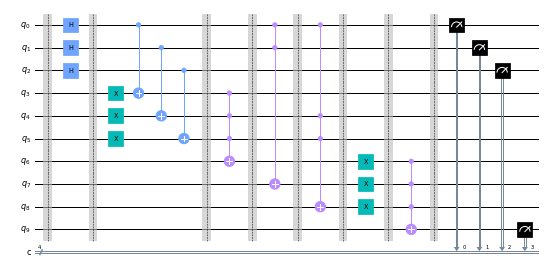

In [19]:
#print(circuit.draw(output='text'))
style = { "figwidth" : 50 }
circuit.draw(output='mpl', scale=0.5)#style=style)

# Exécution, Résultats et visualisation

Table de véritée de F, résultat attendu.

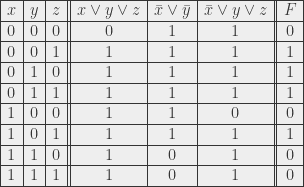

Nombre de '0'et de '1': {'1101': 117, '0111': 118, '0011': 130, '0000': 118, '1100': 115, '1010': 133, '0001': 135, '1110': 134}
{'0001': 135, '1110': 134, '1010': 133, '0011': 130, '0111': 118, '0000': 118, '1101': 117, '1100': 115}


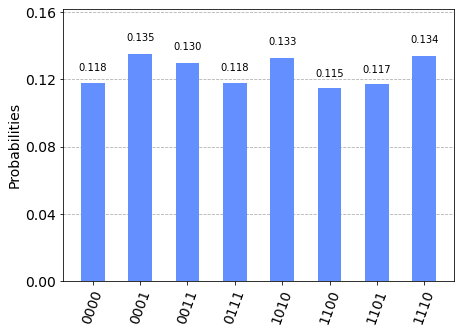

In [20]:
repeat = 1000

simulator = q.Aer.get_backend('qasm_simulator')

simulator.set_options(method="matrix_product_state")

job = q.execute(circuit, simulator, shots=repeat)

result = job.result()

counts = result.get_counts(circuit)
print("Nombre de '0'et de '1':",counts)

sorted_counts = dict( sorted(counts.items(), key=operator.itemgetter(1), reverse=True))
print(sorted_counts)

q.visualization.plot_histogram(counts)


Le 4ième bit indique le résultat de F pour les valeurs des 3 premiers bits

ex)
0101 F=1 pour x=0, y=1, z=0



```
XYZF | XYZ | F
--------------
0101 | 010 | 1
0011 | 001 | 1
1011 | 101 | 1
0111 | 011 | 1
```

On retrouve nos 4 solutions du tableau précédent


In [21]:
import qiskit.tools.jupyter
%qiskit_version_table